In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

customer_data = pd.read_csv('Downloads/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

customer_data.shape


customer_data



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:

data = customer_data.iloc[:, 3:5].values


data



array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

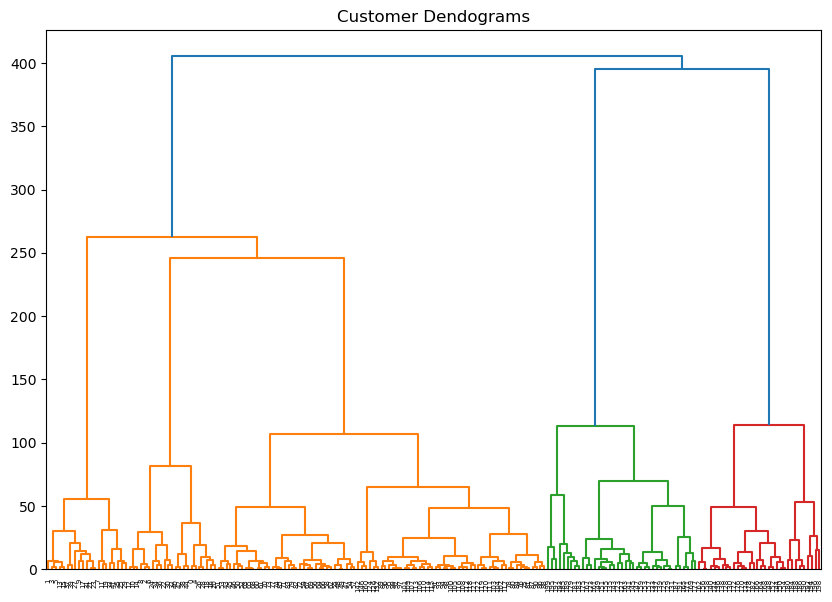

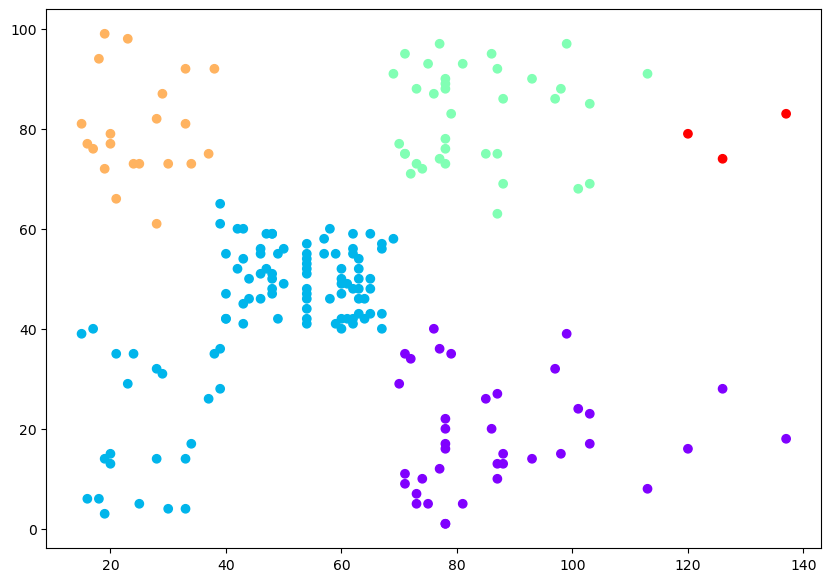

In [18]:

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
labels_=cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Fit the model
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='single')
labels_ = cluster.fit_predict(data)

# Evaluation metrics
silhouette = silhouette_score(data, labels_)
db_index = davies_bouldin_score(data, labels_)
ch_score = calinski_harabasz_score(data, labels_)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")


Silhouette Score: 0.2695
Davies-Bouldin Index: 0.4787
Calinski-Harabasz Score: 7.9330


In [14]:
# complete #Silhouette Score: 0.5530
# Davies-Bouldin Index: 0.5782
# Calinski-Harabasz Score: 243.0714
# ward
# Silhouette Score: 0.5530
# Davies-Bouldin Index: 0.5782
# Calinski-Harabasz Score: 243.0714
# average
# Silhouette Score: 0.4792
# Davies-Bouldin Index: 0.6425
# Calinski-Harabasz Score: 143.4210
# single 
# Silhouette Score: 0.2695
# Davies-Bouldin Index: 0.4787
# Calinski-Harabasz Score: 7.9330